# **Image Manipulation in NumPy & SciPy (iM)**

### **Author: Aaron Tekle**


**This project simply aims to perform image processing/manipulation within  NumPy** (**Num**erical **Py**thon) and SciPy (**Sci**entific **Py**thon).

### **Project Setup:**

We need some dependencies and images for these tasks, let's import them

In [9]:
#Importing Dependencies

import numpy as np #Helps with numerical operations(working with arrays and matrices)
from scipy import ndimage #Many modules within Scipy's ndimage module that allows us to perform these images processing tasks
from scipy import misc #SciPy's misc module gives us acess to the images we will manipulate
import matplotlib.pyplot as plt #Matplotlib allows us to visualize the images/arrays/data

**Loading the image in, converting it into an numpy array and plotting it.**

[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]


<ipython-input-10-95ef169a47a2>:2: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = misc.ascent()


Text(0.5, 1.0, 'Original Image')

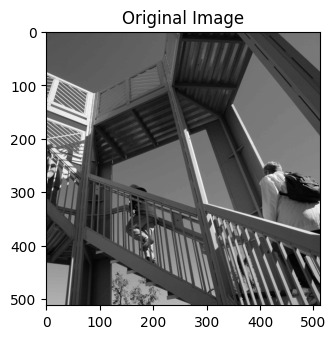

In [10]:
# Loading up the sample image from the scipy.misc library
image = misc.ascent()

# Converting the image to a NumPy array
image_array = np.array(image)
print(image_array) #printing the array onto the terminal

# Plotting the Original Image
plt.figure(figsize=(12, 4)) #image size
plt.subplot(131) #creates a grid of subplots
plt.imshow(image_array, cmap='gray')  #imshow module allows us to display arrays as images
plt.title('Original Image') #title of plot

### **Gaussian Blur:**

**Applying a Gaussian Blur to my image**

[[ 82  82  82 ... 117 117 117]
 [ 82  82  82 ... 117 117 117]
 [ 82  82  82 ... 117 117 117]
 ...
 [176 176 176 ...  55  59  61]
 [177 177 177 ...  52  55  57]
 [177 177 177 ...  50  53  55]]


Text(0.5, 1.0, 'Blurred Image')

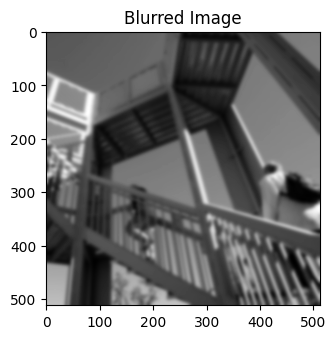

In [11]:
# Applying a Gaussian blur to the image
blurred_image = ndimage.gaussian_filter(image_array, sigma=3) #gaussian blur, sigma parameter allows us to smoothen the image
print(blurred_image)

# Plotting the Blurred image
plt.figure(figsize=(12, 4)) #image size
plt.subplot(132) #creates a grid of subplots
plt.imshow(blurred_image, cmap='gray')  #imshow module allows us to display arrays as images
plt.title('Blurred Image') #title of plot

### **Rotating the Image:**

* **Rotating the image by 45 degrees**

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Text(0.5, 1.0, 'Rotated Image')

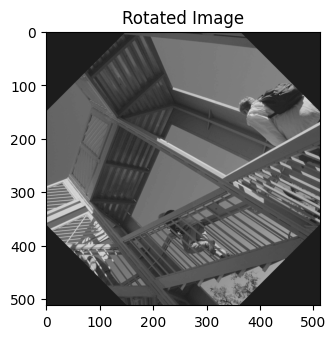

In [12]:
# Rotating the image by 45 degrees
rotated_image = ndimage.rotate(image_array, angle=45, reshape=False)
print(rotated_image)

# Plotting the Rotated image
plt.figure(figsize=(12, 4)) #image size
plt.subplot(133) #creates a grid of 1x3 subplots
plt.imshow(rotated_image, cmap='gray') #imshow module allows us to display arrays as images
plt.title('Rotated Image') #title of plot

### **Image Arithmetic:**

* **Performing arithmetic operations on images using Numpy, we are adding/combining 2 images here.**

[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]


Text(0.5, 1.0, 'combined_Image')

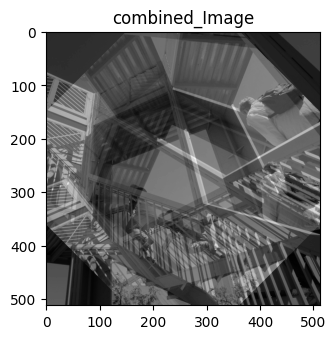

In [13]:
# Add two images pixel-wise
combined_image = image_array + rotated_image
print(combined_image)

# Plotting the Rotated image
plt.figure(figsize=(12, 4)) #size of image
plt.subplot(133) #creates a grid of subplots
plt.imshow(combined_image, cmap='gray')  #imshow module allows us to display arrays as images
plt.title('combined_Image') #title of plot

### **Image Cropping:**

* **Cropping out a region of interest (ROI) from the image using Numpy Slicing**


[[ 90  90  89 ...  95  95  95]
 [ 87  87  89 ...  95  95  95]
 [ 89  88  89 ...  95  95  95]
 ...
 [232 220 241 ...  88  88  83]
 [236 235 233 ...  85  69  52]
 [236 236 236 ...  50  41  40]]


Text(0.5, 1.0, 'Reigon of Interest (ROI)')

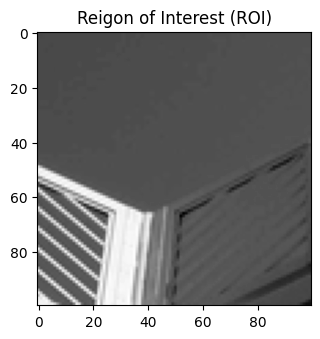

In [14]:
roi = image_array[50:150, 50:150] #Slicing/selecting a portion of the array, allowing us to focus on a reigon of interest within the image array
print(roi)

plt.figure(figsize=(12, 4)) #size of image
plt.subplot(133)  #creates a grid of subplots
plt.imshow(roi, cmap='gray')  #imshow module allows us to display arrays as images
plt.title('Reigon of Interest (ROI)') #title of plot

### **Thresholding:**

* **Applying thresholding to the sample image to create a type of binary image**

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


Text(0.5, 1.0, 'binary_image')

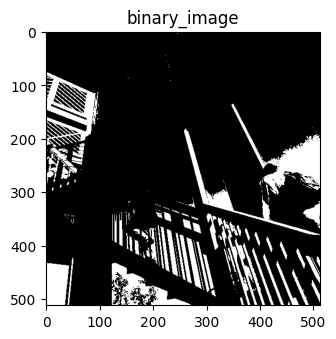

In [15]:
# Thresholding the image (converting to binary)
threshold_value = 128 #threshold value for pixel intensity (values below this become 0, values above become 1)

#Applying thresholding to create the binary image
#This results in the creation of a boolean array where True corresponds to values greather than the threshold
#The astype(np.unit8) converts True to 1 and False to 0, *255 scales the values to 0 and 255
binary_image = (image_array > threshold_value).astype(np.uint8) * 255
print(binary_image)

plt.figure(figsize=(12, 4))
plt.subplot(133) #1x3 grid subplot
plt.imshow(binary_image, cmap='gray')  #imshow module allows us to display arrays as images
plt.title('binary_image')

### **What I Learned:**

* **Learned about Parameters within Python functions:**
    * Parameters within functions are types of temporary variables that exist within the local scope of a function.
    * Parameters within functions are formal variables that refer to another piece of data that provides the needed input to a function.

* **Learned about the intuitions behind subplots within matplotlib:**
  * Within my code, when building a matplotlib subplot, I realized that the `plt.subplot(132)` parameter within my code was not as random as I had initially thought.
    * The first digit `'1'` represents the number of rows in the grid.
    * The second digit `'3'` represents the columns in the grid.
    * The third digit `'2'` represents the index/positions of the subplot within the grid.
  * So to summarize, `plt.subplot(132)` allows me to create a 1x3 grid of subplots, and I am selecting the second subplot for the current plot.
  * This helps me arrange my project, as it allows me to rearrange my images in a row with 3 columns.
* **Learned about the Sigma(σ) parameter within the gaussian filter function:**
  * **Sigma(σ)** determines the Standard Deviation of the Gaussian Kernel, which affects the amount of smoothing or blurring applied to the image.
  * Increasing sigma results in an image that is "*smoother*", decreasing sigma results in an image that is not as smooth (*vice-versa*).
* **Learned about thresholding within image processing:**
  * Thresholding is a type of technique that allows one to convert a colored/grayscale image into a binary image.

### **References:**


*   [**C Functions**
](https://www.geeksforgeeks.org/c-functions/)

